# Assignment 1 - Building a Vision Model with Keras

In this assignment, you will build a simple vision model using Keras. The goal is to classify images from the Fashion MNIST dataset, which contains images of clothing items.

You will:
1. Load and inspect the Fashion MNIST dataset.
2. Run a simple baseline model to establish a performance benchmark.
3. Build and evaluate a simple CNN model, choosing appropriate loss and metrics.
4. Design and run controlled experiments on one hyperparameter (e.g., number of filters, kernel size, etc.) and one regularization technique (e.g., dropout, L2 regularization).
5. Analyze the results and visualize the model's performance.

# 1. Loading and Inspecting the Dataset

Fashion MNIST is a dataset of grayscale images of clothing items, with 10 classes. Each image is 28x28 pixels, like the MNIST dataset of handwritten digits. Keras provides a convenient way to load this dataset. 

In this section, you should:

- [ ] Inspect the shapes of the training and test sets to confirm their size and structure.
- [ ] Convert the labels to one-hot encoded format if necessary. (There is a utility function in Keras for this.)
- [ ] Visualize a few images from the dataset to understand what the data looks like.

In [40]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalize the pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Classes in the Fashion MNIST dataset
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [41]:
# Inspect the shapes of the datasets
print("Shape of the training set, X_train: ", X_train.shape)
print("Shape of the training labels, y_yrain: ", y_train.shape)
print("Shape of the testing set, X_test: ", X_test.shape)
print("Shape of the testing labels, y_test: ", y_test.shape)

# Convert labels to one-hot encoding
from tensorflow.keras.utils import to_categorical
print(f'Before one-hot encoding: {y_train[0]}')
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
print(f'After one-hot encoding: {y_train[0]}')


Shape of the training set, X_train:  (60000, 28, 28)
Shape of the training labels, y_yrain:  (60000,)
Shape of the testing set, X_test:  (10000, 28, 28)
Shape of the testing labels, y_test:  (10000,)
Before one-hot encoding: 9
After one-hot encoding: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


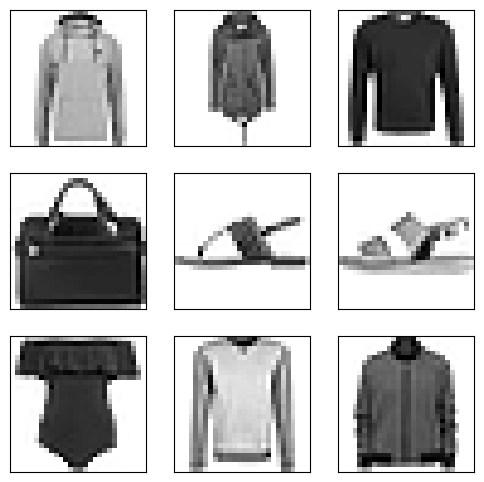

In [14]:
import matplotlib.pyplot as plt
import numpy as np
# Verify the data looks as expected
# Selecting 9 random indices
random_indices = np.random.choice(len(X_train), 9, replace=False)

# Creating a 3x3 grid plot
fig, axes = plt.subplots(3, 3, figsize=(6, 6))

for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[random_indices[i]], cmap=plt.cm.gray_r, interpolation='nearest')

    # Removing axis labels
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()


Reflection: Does the data look as expected? How is the quality of the images? Are there any issues with the dataset that you notice?

**The data look as expected. The data are grayscale images of items such as T-shirs bags, and sandals. The quality of the images is very low, and visually it is hard to distinguish between certain categories such as pullovers and t-shirts.**

# 2. Baseline Model

In this section, you will create a linear regression model as a baseline. This model will not use any convolutional layers, but it will help you understand the performance of a simple model on this dataset.
You should:
- [ ] Create a simple linear regression model using Keras.
- [ ] Compile the model with an appropriate loss function and optimizer.
- [ ] Train the model on the training set and evaluate it on the test set.

A linear regression model can be created using the `Sequential` API in Keras. Using a single `Dense` layer with no activation function is equivalent to a simple linear regression model. Make sure that the number of units in the output layer matches the number of classes in the dataset.

Note that for this step, we will need to use `Flatten` to convert the 2D images into 1D vectors before passing them to the model. Put a `Flatten()` layer as the first layer in your model so that the 2D image data can be flattened into 1D vectors.

Epoch 1/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 799us/step - accuracy: 0.6433 - loss: 1.1348 - val_accuracy: 0.7890 - val_loss: 0.6567
Epoch 2/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 619us/step - accuracy: 0.7981 - loss: 0.6339 - val_accuracy: 0.8088 - val_loss: 0.5813
Epoch 3/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 589us/step - accuracy: 0.8161 - loss: 0.5673 - val_accuracy: 0.8192 - val_loss: 0.5422
Epoch 4/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 598us/step - accuracy: 0.8223 - loss: 0.5423 - val_accuracy: 0.8232 - val_loss: 0.5225
Epoch 5/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 611us/step - accuracy: 0.8298 - loss: 0.5167 - val_accuracy: 0.8275 - val_loss: 0.5089
Epoch 6/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 620us/step - accuracy: 0.8371 - loss: 0.4942 - val_accuracy: 0.8297 - val_loss: 0.4977
Epoch 7/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 603us/step - accuracy: 0.8353 - loss: 0.4965 - val_accuracy: 0.8335 - val_loss: 0.4875
Epoch 8/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 597us/step - accuracy: 0.8401 -

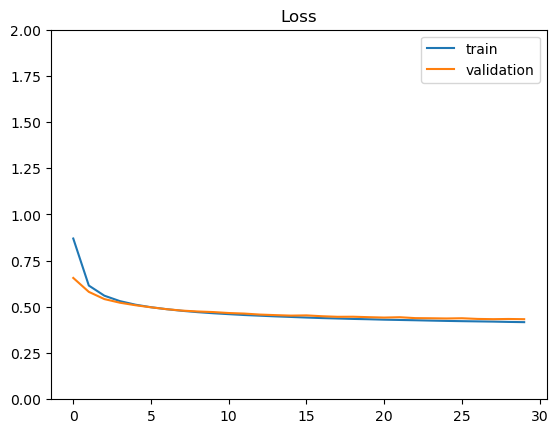

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

# Create a simple linear regression model
model = Sequential()
# You can use `model.add(<layer>)` to add layers to the model

# Input layer
model.add(Flatten()) # Flatten the 2D layer into a single vector

# Output layer
model.add(Dense(10, activation='softmax'))  # 10 neurons, softmax activation to get a classification into one of 10 classes.

#model.summary()

# Compile the model using `model.compile()`
model.compile(
    loss='categorical_crossentropy', # Loss function
    optimizer='sgd', # Optimizer
    metrics=['accuracy'] # Metrics to evaluate the model
)

# Training the model
history = model.fit(X_train, # Training data
    y_train, # Training labels
    epochs=30, # Number of epochs
    batch_size=32, # Number of samples per batch
    validation_split=0.2 # Use 20% of the data for validation)
)

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.ylim(0, 2)
plt.legend(loc='best')
plt.title('Loss')

# Evaluate the model with `model.evaluate()`
loss, accuracy = model.evaluate(X_test, y_test)

print(f'Loss:     {loss:.2f}')
print(f'Accuracy: {accuracy*100:.2f}%')

Reflection: What is the performance of the baseline model? How does it compare to what you expected? Why do you think the performance is at this level?

**The performance of the baseline model on the test set is loss = 0.46, accuracy = 83.86% after 30 epochs. This is a fairly decent performance. After 30 epochs, the model starts to slightly overfit. The performance is at this level, because the images are fairly low resolution and the rest of the images may be too confusing for the model to distinguish with a simple model.**

# 3. Building and Evaluating a Simple CNN Model

In this section, you will build a simple Convolutional Neural Network (CNN) model using Keras. A convolutional neural network is a type of deep learning model that is particularly effective for image classification tasks. Unlike the basic neural networks we have built in the labs, CNNs can accept images as input without needing to flatten them into vectors.

You should:
- [ ] Build a simple CNN model with at least one convolutional layer (to learn spatial hierarchies in images) and one fully connected layer (to make predictions).
- [ ] Compile the model with an appropriate loss function and metrics for a multi-class classification problem.
- [ ] Train the model on the training set and evaluate it on the test set.

Convolutional layers are designed to accept inputs with three dimensions: height, width and channels (e.g., RGB for color images). For grayscale images like those in Fashion MNIST, the input shape will be (28, 28, 1).

When you progress from the convolutional layers to the fully connected layers, you will need to flatten the output of the convolutional layers. This can be done using the `Flatten` layer in Keras, which doesn't require any parameters.

In [42]:
from keras.layers import Conv2D, Input

# Reshape the data to include the channel dimension
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [43]:
X_train.shape

(60000, 28, 28, 1)

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 24, 24, 10)     │           260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_16 (Flatten)            │ (None, 5760)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 128)            │       737,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 738,958 (2.82 MB)

 Trainable params: 738,958 (2.82 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7003 - loss: 0.8740 - val_accuracy: 0.8236 - val_loss: 0.4932
Epoch 2/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8284 - loss: 0.4791 - val_accuracy: 0.8433 - val_loss: 0.4343
Epoch 3/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8546 - loss: 0.4129 - val_accuracy: 0.8285 - val_loss: 0.4564
Epoch 4/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8664 - loss: 0.3793 - val_accuracy: 0.8534 - val_loss: 0.4015
Epoch 5/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8744 - loss: 0.3506 - val_accuracy: 0.8700 - val_loss: 0.3718
Epoch 6/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8787 - loss: 0.3354 - val_accuracy: 0.8751 - val_loss: 0.3497
Epoch 7/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8880 - loss: 0.3189 - val_accuracy: 0.8768 - val_loss: 0.3473
Epoch 8/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8909 - loss: 0

Text(0.5, 1.0, 'Loss')

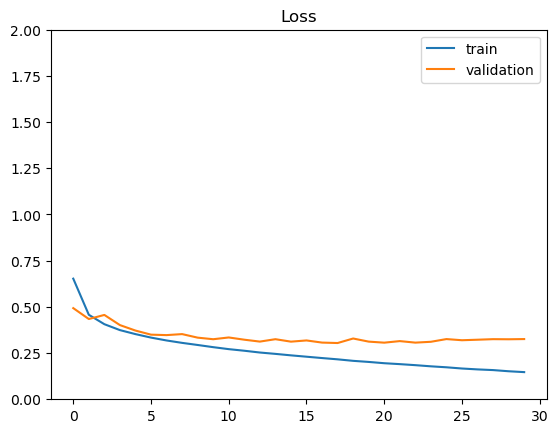

In [46]:


# Create a simple CNN model
model = Sequential()
model.add(Input((28,28,1)))
model.add(Conv2D(filters=10, kernel_size=(5, 5)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation = "softmax"))

model.summary()
# Compile the model using `model.compile()`
model.compile(
    loss='categorical_crossentropy', # Loss function
    optimizer='sgd', # Optimizer
    metrics=['accuracy'] # Metrics to evaluate the model
)

# Training the model
history = model.fit(X_train, # Training data
    y_train, # Training labels
    epochs=30, # Number of epochs
    batch_size=32, # Number of samples per batch
    validation_split=0.2 # Use 20% of the data for validation)
)

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.ylim(0, 2)
plt.legend(loc='best')
plt.title('Loss')



In [47]:

# Evaluate the model with `model.evaluate()`
loss, accuracy = model.evaluate(X_test, y_test)

print(f'Loss:     {loss:.2f}')
print(f'Accuracy: {accuracy*100:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8826 - loss: 0.3670
Loss:     0.36
Accuracy: 88.38%


Reflection: Did the CNN model perform better than the baseline model? If so, by how much? What do you think contributed to this improvement?

**Yes, the CNN model performs better than the baseline model on the test set, even though the model overfits the training data. The CNN model has a lower loss at 0.36 comapred to 0.46 for baseline model, and higher accuracy on X_test at 88.38% compared to 83.86% with baseline model, an improvement of ~4.5% points. Most likely, the improvement in performance is due to the model learning 2D patters in the image, instead of flattening th images into a single vector as was done by the baseline model. The CNN model also has more number of parameters compared to the baseline model.*

# 4. Designing and Running Controlled Experiments

In this section, you will design and run controlled experiments to improve the model's performance. You will focus on one hyperparameter and one regularization technique.
You should:
- [ ] Choose one hyperparameter to experiment with (e.g., number of filters, kernel size, number of layers, etc.) and one regularization technique (e.g., dropout, L2 regularization). For your hyperparameter, you should choose at least three different values to test (but there is no upper limit). For your regularization technique, simply test the presence or absence of the technique.
- [ ] Run experiments by modifying the model architecture or hyperparameters, and evaluate the performance of each model on the test set.
- [ ] Record the results of your experiments, including the test accuracy and any other relevant metrics.
- [ ] Visualize the results of your experiments using plots or tables to compare the performance of different models.

The best way to run your experiments is to create a `for` loop that iterates over a range of values for the hyperparameter you are testing. For example, if you are testing different numbers of filters, you can create a loop that runs the model with 32, 64, and 128 filters. Within the loop, you can compile and train the model, then evaluate it on the test set. After each iteration, you can store the results in a list or a dictionary for later analysis.

Note: It's critical that you re-initialize the model (by creating a new instance of the model) before each experiment. If you don't, the model will retain the weights from the previous experiment, which can lead to misleading results.

In [49]:
# A. Test Hyperparameters

results_history = {}
results_loss = {}
results_accuracy = {}
# hyperparameter to test - filters - 10, 32, 64, 128
for filter_size in [10, 32, 64, 128]:
    # Create a simple CNN model
    model = Sequential()
    model.add(Input((28,28,1)))
    model.add(Conv2D(filters=filter_size, kernel_size=(5, 5)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation = "softmax"))

    model.compile(
    loss='categorical_crossentropy', # Loss function
    optimizer='sgd', # Optimizer
    metrics=['accuracy'] # Metrics to evaluate the model
    )

    # Training the model
    history = model.fit(X_train, # Training data
        y_train, # Training labels
        epochs=10, # Number of epochs
        batch_size=32, # Number of samples per batch
        validation_split=0.2 # Use 20% of the data for validation)
    )
    results_history[f'filter_size_{filter_size}'] = history
    # Evaluate the model with `model.evaluate()`
    loss, accuracy = model.evaluate(X_test, y_test)
    
    results_loss[f'filter_size_{filter_size}'] = loss
    results_accuracy[f'filter_size_{filter_size}'] = accuracy


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.7018 - loss: 0.8745 - val_accuracy: 0.8239 - val_loss: 0.4924
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.8344 - loss: 0.4632 - val_accuracy: 0.8516 - val_loss: 0.4226
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8529 - loss: 0.4135 - val_accuracy: 0.8581 - val_loss: 0.4038
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8680 - loss: 0.3681 - val_accuracy: 0.8667 - val_loss: 0.3708
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8753 - loss: 0.3488 - val_accuracy: 0.8743 - val_loss: 0.3571
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.8818 - loss: 0.3314 - val_accuracy: 0.8713 - val_loss: 0.3568
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.8872 - loss: 0.3139 - val_accuracy: 0.8793 - val_loss: 0.3440
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.8921 - loss: 0

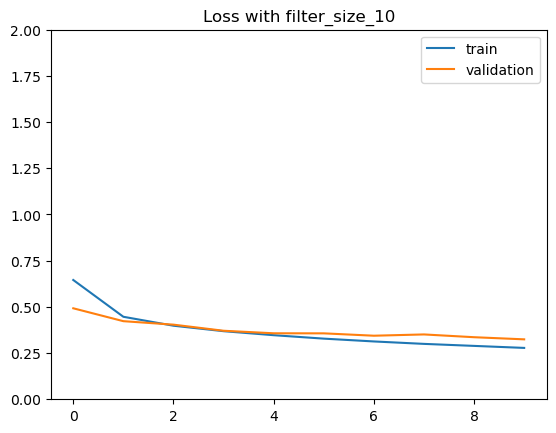

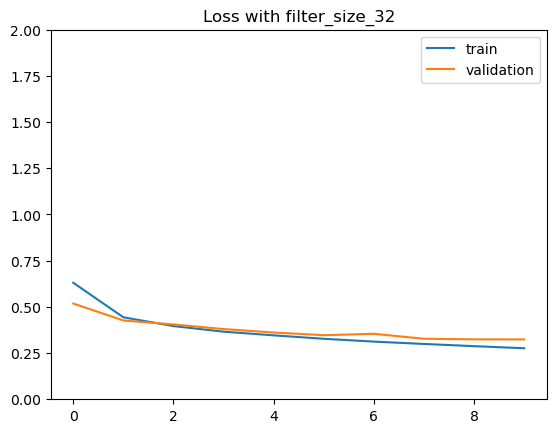

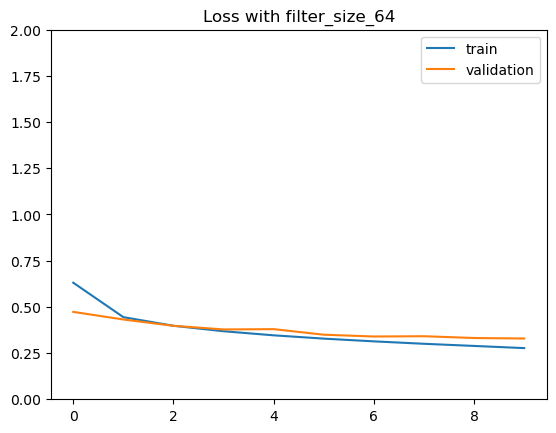

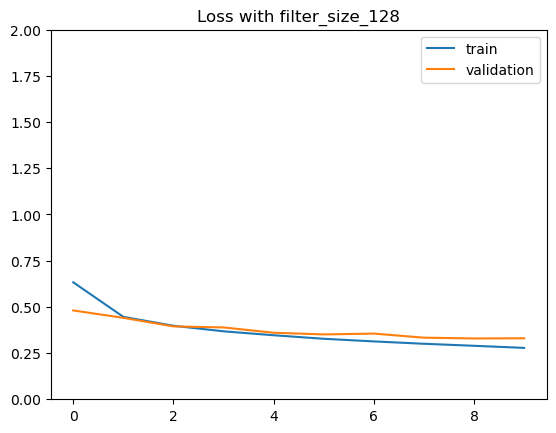

In [ ]:

for key in results_history.keys():
    history = results_history[key]
    #print(history)
    plt.figure()
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='validation')
    plt.ylim(0, 2)
    plt.legend(loc='best')
    plt.title('Loss with '+ key)


In [55]:
print("accuracy values on test set: ",results_accuracy)
print("loss values on test set: ", results_loss)

accuracy values on test set:  {'filter_size_10': 0.8777999877929688, 'filter_size_32': 0.8741000294685364, 'filter_size_64': 0.8747000098228455, 'filter_size_128': 0.8718000054359436}
loss values on test set:  {'filter_size_10': 0.3496592938899994, 'filter_size_32': 0.3469492495059967, 'filter_size_64': 0.3527860939502716, 'filter_size_128': 0.3592894673347473}


In [62]:
from keras.layers import Dropout
# B. Test presence or absence of regularization
# regularization technique - dropout
filter_size = 32
include_regularization = [True, False]

results_history_reg = {}
results_loss_reg = {}
results_accuracy_reg = {}

for boolean in include_regularization:
    # Create a simple CNN model
    model = Sequential()
    model.add(Input((28,28,1)))
    model.add(Conv2D(filters=filter_size, kernel_size=(5, 5), activation = "relu"))
    if boolean:
        model.add(Dropout(0.2)) # Dropout layer with a rate of 0.2 (20% of neurons dropped)
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    if boolean:
        model.add(Dropout(0.2)) # Dropout layer with a rate of 0.2 (20% of neurons dropped)
    model.add(Dense(10, activation = "softmax"))

    model.compile(
    loss='categorical_crossentropy', # Loss function
    optimizer='sgd', # Optimizer
    metrics=['accuracy'] # Metrics to evaluate the model
    )

    # Training the model
    history = model.fit(X_train, # Training data
        y_train, # Training labels
        epochs=10, # Number of epochs
        batch_size=32, # Number of samples per batch
        validation_split=0.2 # Use 20% of the data for validation)
    )
    results_history_reg[f'regularization is {boolean}'] = history
    # Evaluate the model with `model.evaluate()`
    loss, accuracy = model.evaluate(X_test, y_test)

    results_loss_reg[f'regularization is {boolean}'] = loss
    results_accuracy_reg[f'regularization is {boolean}'] = accuracy


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.6706 - loss: 0.9394 - val_accuracy: 0.8200 - val_loss: 0.5013
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.8099 - loss: 0.5207 - val_accuracy: 0.8396 - val_loss: 0.4469
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.8376 - loss: 0.4584 - val_accuracy: 0.8527 - val_loss: 0.4159
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.8481 - loss: 0.4223 - val_accuracy: 0.8618 - val_loss: 0.3873
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 25s 17ms/step - accuracy: 0.8602 - loss: 0.3928 - val_accuracy: 0.8683 - val_loss: 0.3641
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 25s 17ms/step - accuracy: 0.8645 - loss: 0.3756 - val_accuracy: 0.8712 - val_loss: 0.3543
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 28s 19ms/step - accuracy: 0.8708 - loss: 0.3592 - val_accuracy: 0.8752 - val_loss: 0.3406
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 20ms/step - accuracy: 0.8770 -

accuracy values on test set for regularization testing: 
 {'regularization is True': 0.8762000203132629, 'regularization is False': 0.8798999786376953}

loss values on test set: 
 {'regularization is True': 0.34206709265708923, 'regularization is False': 0.3300296664237976}


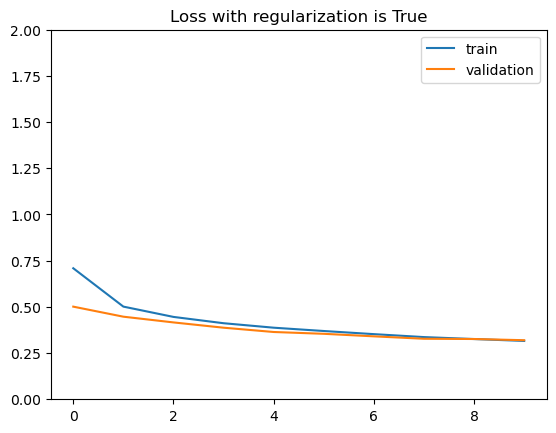

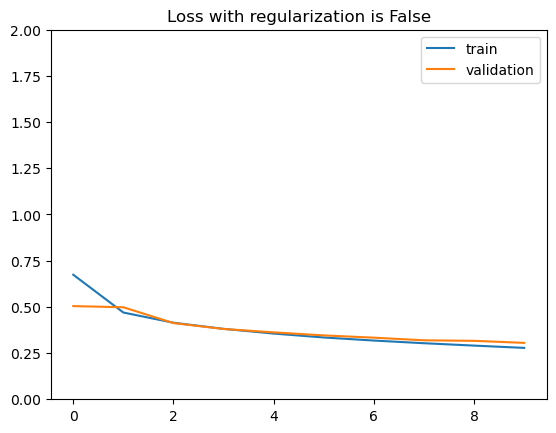

In [63]:
for key in results_history_reg.keys():
    history = results_history_reg[key]
    #print(history)
    plt.figure()
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='validation')
    plt.ylim(0, 2)
    plt.legend(loc='best')
    plt.title('Loss with '+ key)

print("accuracy values on test set for regularization testing: \n",results_accuracy_reg)
print("\nloss values on test set: \n", results_loss_reg)


Reflection: Report on the performance of the models you tested. Did any of the changes you made improve the model's performance? If so, which ones? What do you think contributed to these improvements? Finally, what combination of hyperparameters and regularization techniques yielded the best performance?

**I chose filter size as the hyperparameter to test and Dropout as my regularization parameter.
- For filter_size, I tested the values 10, 32, 64, and 128 and found that the loss on test set decreased a small amount from 0.350 to 0.347, and accuracy actually decreased from 87.8% to 87.4% on increasing the value of filter_size from 10 to 32. On further increase, the accuracy remained similar and loss increased. Therefore, I chose 32 as my final filter_size.
- For regularization, I added a dropout layer with 20% drop rate on the COnv2D layer and on the fully-connected layer after the Conv2D layer. 
- I also added an activation function on the Conv2D layer, just because I had realized that I had forgotten to add activation on it before.
- Regularization with dropout did not improve the performance, and we get a smaller loss of 0.33 (compared to 0.34) and higher accuracy of 87.99% (compared to 87.62%) without regularization.
- The best combination of hyperparameters and regularization techniques is a filter_size of 32 and no dropout and an activation function of 'relu' applied to the Conv2D layer.
**

# 5. Training Final Model and Evaluation

In this section, you will train the final model using the best hyperparameters and regularization techniques you found in the previous section. You should:
- [ ] Compile the final model with the best hyperparameters and regularization techniques.
- [ ] Train the final model on the training set and evaluate it on the test set.
- [ ] Report the final model's performance on the test set, including accuracy and any other relevant metrics.

Epoch 1/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.6896 - loss: 0.8955 - val_accuracy: 0.8208 - val_loss: 0.4999
Epoch 2/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.8272 - loss: 0.4875 - val_accuracy: 0.8512 - val_loss: 0.4324
Epoch 3/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.8493 - loss: 0.4224 - val_accuracy: 0.8496 - val_loss: 0.4164
Epoch 4/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.8626 - loss: 0.3813 - val_accuracy: 0.8667 - val_loss: 0.3793
Epoch 5/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.8740 - loss: 0.3550 - val_accuracy: 0.8717 - val_loss: 0.3578
Epoch 6/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.8746 - loss: 0.3434 - val_accuracy: 0.8760 - val_loss: 0.3446
Epoch 7/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.8861 - loss: 0.3165 - val_accuracy: 0.8776 - val_loss: 0.3352
Epoch 8/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.8894 -

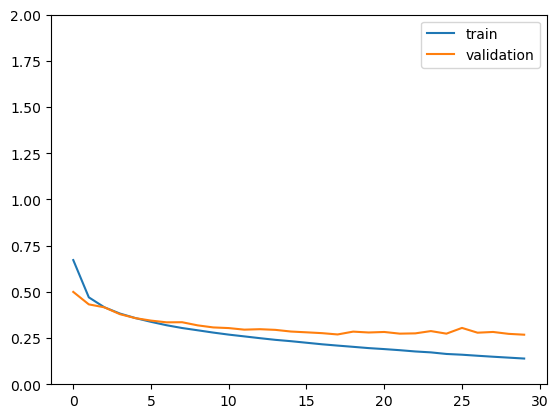

In [64]:
filter_size = 32
include_regularization = False

# Create a simple CNN model
model = Sequential()
model.add(Input((28,28,1)))
model.add(Conv2D(filters=filter_size, kernel_size=(5, 5), activation = 'relu'))
if include_regularization:
    model.add(Dropout(0.2)) # Dropout layer with a rate of 0.2 (20% of neurons dropped)
model.add(Flatten())
model.add(Dense(128, activation='relu'))
if include_regularization:
    model.add(Dropout(0.2)) # Dropout layer with a rate of 0.2 (20% of neurons dropped)
model.add(Dense(10, activation = "softmax"))

model.compile(
loss='categorical_crossentropy', # Loss function
optimizer='sgd', # Optimizer
metrics=['accuracy'] # Metrics to evaluate the model
)

# Training the model
history = model.fit(X_train, # Training data
    y_train, # Training labels
    epochs=30, # Number of epochs
    batch_size=32, # Number of samples per batch
    validation_split=0.2 # Use 20% of the data for validation)
)

plt.figure()
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.ylim(0, 2)
plt.legend(loc='best')

# Evaluate the model with `model.evaluate()`
loss, accuracy = model.evaluate(X_test, y_test)

print(f'Final Loss:     {loss:.2f}')
print(f'Final Accuracy: {accuracy*100:.2f}%')

Reflection: How does the final model's performance compare to the baseline and the CNN model? What do you think contributed to the final model's performance? If you had time, what other experiments would you run to further improve the model's performance?

**
- Final model performance on test set was compared with baseline model and CNN model at the end of epoch 30: Accuracy = 90.29% and Loss = 0.29. The accuracy may improve further with more training time since the validation loss is still going down, despite the model overfitting at the end of epoch 30.
- I did not find significant improvement with increased filter_size or with droput regularization in the Convolutional neural network. This is likely because the data itself is the bottleneck and the simplest CNN model is sufficient to pick the patterns in the data.
- If I had more time, I would experiment with the model architecture, such as more layers in the network and changing the number of neurons in different layers as well as more regularization techniques such as Dropout layer after the Convolutional neural network as well.
- An important note is that I tested each model for 10 epochs for the purpose of comparison since the models take a long time to run. We can increase the number of epochs for the final model because even though there is overfitting, both the training loss and the validation loss continue to go down atleast until 30 epochs and therefore, we will expect the peformance on test set will get better with more training until the validation loss flattens.
**

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.
### Submission Parameters:
* Submission Due Date: `23:59 PM - 26/10/2025`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb)
    * The Lab 1 notebook (labs/lab_1.ipynb)
    * The Lab 2 notebook (labs/lab_2.ipynb)
    * The Lab 3 notebook (labs/lab_3.ipynb)
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
* Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.
Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.
If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-7-help-ml`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.